A crossover is the most basic type of signal when the price of an asset moves from one side of the moving averages and closes on the other. It is used to identify shifts in momentum and can be used as a basic entry or exit strategy.

---

* Trade the asset when the fast moving average crosses over the slow moving average.
* Exit the trade when the fast moving average crosses over the slow moving average again.

In [7]:
import pandas as pd
import pandas_datareader.data as web
import datetime

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import pylab

%matplotlib inline

In [8]:
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

In [9]:
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

In [10]:
apple = web.DataReader("AAPL", "yahoo", start, end)

In [ ]:
apple["Adj Close"].plot(grid= True)

In [12]:
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
apple["50d"] = np.round(apple["Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Close"].rolling(window = 200, center = False).mean(), 2)

We first identify when the 20-day average is below the 50-day average, and vice versa.
The sign of this difference is defined as the regime.


In [18]:
apple['20d-50d'] = apple['20d'] - apple['50d']

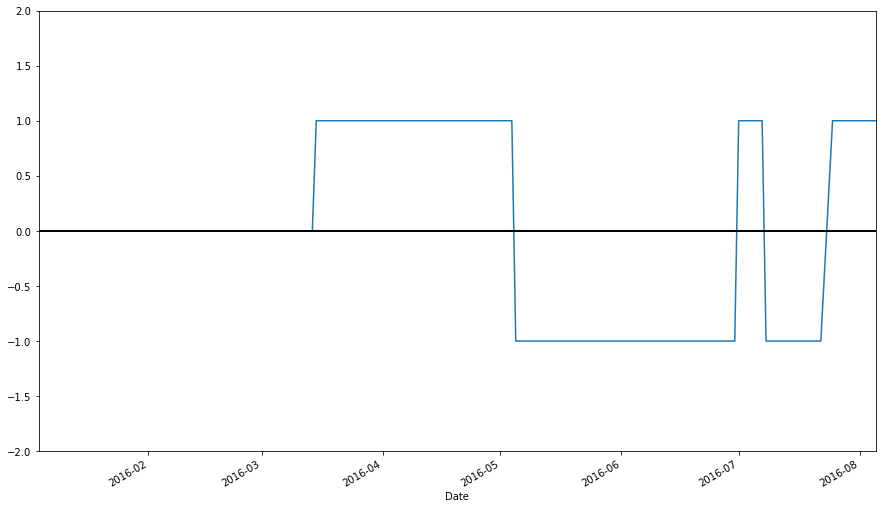

In [20]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
apple["Regime"] = np.where(apple['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
apple["Regime"] = np.where(apple['20d-50d'] < 0, -1, apple["Regime"])
apple.loc['2016-01-01':'2016-08-07',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

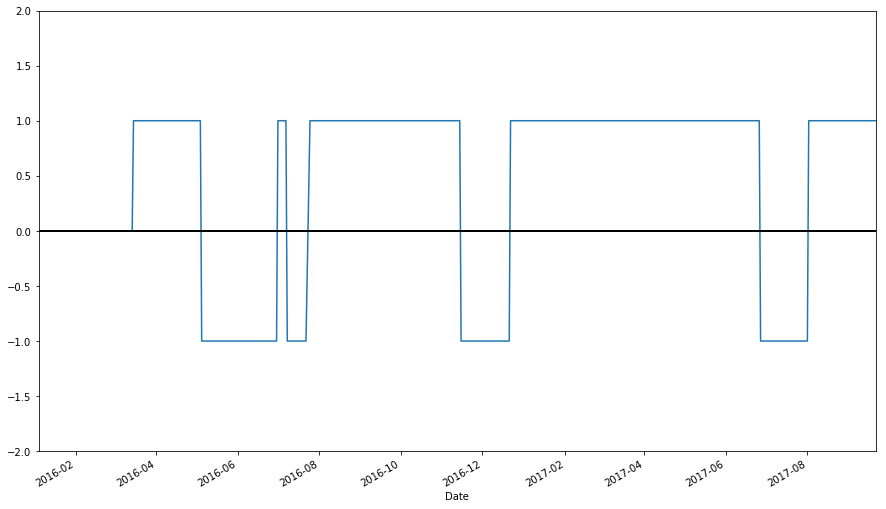

In [21]:
apple["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [22]:
apple["Regime"].value_counts()

 1    283
-1    102
 0     49
Name: Regime, dtype: int64

Trading signals appear at regime changes. When a bullish regime begins, a buy signal is triggered, and when it ends, a sell signal is triggered. Likewise, when a bearish regime begins, a sell signal is triggered, and when the regime ends, a buy signal is triggered (this is of interest only if you ever will short the stock, or use some derivative like a stock option to bet against the market).